In [81]:
import os

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import train_test_split
import warnings

In [83]:
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:.7f}'.format

**Load data**

In [84]:
data_df = pd.read_csv('vegemite.csv')

In [85]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15237 entries, 0 to 15236
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   FFTE Feed tank level SP        15237 non-null  float64
 1   FFTE Production solids SP      15237 non-null  float64
 2   FFTE Steam pressure SP         15237 non-null  float64
 3   TFE Out flow SP                15237 non-null  float64
 4   TFE Production solids SP       15237 non-null  float64
 5   TFE Vacuum pressure SP         15237 non-null  float64
 6   TFE Steam pressure SP          15237 non-null  float64
 7   TFE Steam temperature SP       15237 non-null  float64
 8   FFTE Feed flow SP              15237 non-null  float64
 9   FFTE Out steam temp SP         15237 non-null  float64
 10  Extract tank Level             15237 non-null  float64
 11  Extract tank Out flow PV       15237 non-null  float64
 12  FFTE Discharge density         15237 non-null 

In [86]:
data_df.head()

,FFTE Feed tank level SP,FFTE Production solids SP,FFTE Steam pressure SP,TFE Out flow SP,TFE Production solids SP,TFE Vacuum pressure SP,TFE Steam pressure SP,TFE Steam temperature SP,FFTE Feed flow SP,FFTE Out steam temp SP,Extract tank Level,Extract tank Out flow PV,FFTE Discharge density,FFTE Discharge solids,FFTE Feed flow rate PV,FFTE Feed tank level PV,FFTE Heat temperature 1,FFTE Heat temperature 2,FFTE Heat temperature 3,FFTE Out steam temp PV,FFTE Production solids PV,FFTE Pump 1,FFTE Pump 1 - 2,FFTE Pump 2,FFTE Steam pressure PV,FFTE Temperature 1 - 1,FFTE Temperature 1 - 2,FFTE Temperature 2 - 1,FFTE Temperature 2 - 2,FFTE Temperature 3 - 1,FFTE Temperature 3 - 2,FFTE Unk Temperature,TFE Feed pump,TFE Input flow PV,TFE Level,TFE Motor current,TFE Motor speed,TFE Out flow PV,TFE Product out temperature,TFE Production solids PV,TFE Production solids density,TFE Steam pressure PV,TFE Steam temperature,TFE Tank level,TFE Temperature,TFE Vacuum pressure PV,Class
0,50.0000000,40.7400000,125.0000000,2897.6500000,69.0000000,-80.0000000,125.0000000,80.0000000,10130.0000000,49.8800000,66.4100000,1.8500000,1.2900000,47.8900000,10100.5200000,54.5700000,44.9300000,55.7600000,55.1200000,50.1500000,48.9700000,80.0000000,100.0000000,81.0000000,126.0300000,67.4500000,69.5400000,58.9300000,53.4200000,7.4400000,67.9600000,72.2900000,19.5000000,1962.3900000,45.9200000,29.1100000,80.0000000,2577.8200000,0.0000000,62.8700000,1.1900000,125.0300000,72.6800000,83.6800000,71.0000000,-77.7400000,1
1,50.0000000,40.7400000,125.0000000,2897.6500000,69.0000000,-79.4500000,125.0000000,80.0000000,10130.0000000,49.8800000,62.6900000,1.7500000,1.2900000,51.1500000,10125.8100000,52.1700000,44.9300000,55.7600000,55.1200000,50.1500000,51.0700000,80.0000000,100.0000000,81.0000000,124.9600000,67.4500000,69.5400000,58.9300000,53.4200000,7.4400000,68.2800000,64.6600000,19.5000000,1891.7000000,45.9200000,30.2800000,80.0000000,1551.8800000,0.0000000,67.9800000,1.1900000,125.0300000,64.6600000,82.9500000,69.0000000,-79.4900000,1
2,50.0000000,40.7400000,125.0000000,2897.6500000,69.0000000,-71.5400000,125.0000000,80.0000000,10130.0000000,49.8800000,65.0500000,1.7500000,1.2900000,51.1500000,10107.0000000,56.8800000,44.9300000,56.1100000,55.1200000,50.1500000,51.7700000,80.0000000,100.0000000,81.0000000,125.6700000,67.5200000,69.7000000,58.9300000,53.4200000,7.4400000,68.2800000,65.6300000,19.5000000,1815.1800000,45.1800000,29.6400000,80.0000000,1564.8500000,0.0000000,70.3800000,1.1900000,124.7100000,65.6300000,82.7700000,72.0000000,-75.2800000,1
3,50.0000000,40.7400000,125.0000000,2897.6500000,69.0000000,-68.4400000,125.0000000,80.0000000,10130.0000000,49.8800000,61.9300000,1.7500000,1.2900000,51.1500000,10119.9700000,56.8100000,44.9300000,56.1100000,55.1200000,50.1500000,52.4600000,80.0000000,100.0000000,81.0000000,125.6700000,67.5200000,69.7000000,58.9300000,54.8000000,7.4400000,68.2800000,65.6300000,19.5000000,1725.0300000,45.1800000,29.3100000,80.0000000,1512.9700000,0.0000000,69.1800000,1.1900000,124.7100000,74.3500000,82.5500000,76.0000000,-69.6500000,1
4,50.0000000,39.0000000,90.0000000,2694.6200000,64.0000000,-80.0000000,120.0000000,80.0000000,9300.0000000,49.8800000,67.3900000,8.4700000,1.1300000,51.2000000,9280.1600000,56.4300000,47.6800000,62.2900000,62.5500000,49.0300000,43.3600000,80.0000000,100.0000000,81.0000000,88.2900000,75.2400000,76.9700000,59.5000000,53.1000000,5.8400000,76.0700000,70.4300000,21.7900000,2128.4000000,48.0400000,27.6900000,80.0000000,1795.7200000,0.0000000,41.1400000,0.9000000,119.9100000,70.8200000,83.9600000,71.0000000,-75.2800000,1


# **Prepare Data**

**Read and suffle data**

In [87]:
shuffled_df = data_df.sample(n=len(data_df)).reset_index(drop=True)
shuffled_df.to_csv('shuffled_vegemite.csv', index=False)
shuffled_df.shape

(15237, 47)

**Randomly take out 1000 data points (rows) in such a way that each class in those 1000 samples has near equal distribution**

In [88]:
train_df, test_df = train_test_split(shuffled_df, test_size=1000, stratify=data_df['Class'], random_state=1)
print(f"train_df shape: {train_df.shape}")
print(f"test_df shape: {test_df.shape}")

train_df.to_csv('train_df_vegemite.csv', index=False)
test_df.to_csv('realtime_test_df_vegemite.csv', index=False)

train_df shape: (14237, 47)
test_df shape: (1000, 47)


**Remove columns with constants**

In [89]:
columns_to_drop = [c for c in train_df.columns if train_df[c].nunique() == 1]
train_df = train_df.drop(columns=columns_to_drop)
print(f"Removed columns {columns_to_drop} since they have only one unique value")

Removed columns ['TFE Steam temperature SP', 'TFE Product out temperature'] since they have only one unique value


In [90]:
train_df.shape

(14237, 45)

**Convert column with few integter into categorial feature**

In [91]:
MAX_VALUES_TO_CONVERT_TO_CATEGORICAL = 5
columns_to_convert = [c for c in train_df.columns if c != 'Class' and train_df[c].nunique() <= MAX_VALUES_TO_CONVERT_TO_CATEGORICAL]

print(f"Columns need to convert: ", columns_to_convert)

Columns need to convert:  ['FFTE Feed tank level SP', 'FFTE Pump 1', 'FFTE Pump 1 - 2', 'FFTE Pump 2', 'TFE Motor speed']


In [92]:
label_encoders = {}

for c in columns_to_convert:
  encoder = LabelEncoder()
  train_df[c] = encoder.fit_transform(train_df[c])
  label_encoders[c] = encoder

print("Label encoders for each columns: ", label_encoders)
train_df.to_csv("converted_vegemite.csv", index=False)

Label encoders for each columns:  {'FFTE Feed tank level SP': LabelEncoder(), 'FFTE Pump 1': LabelEncoder(), 'FFTE Pump 1 - 2': LabelEncoder(), 'FFTE Pump 2': LabelEncoder(), 'TFE Motor speed': LabelEncoder()}


**Class distribution**

Class
2    7069
1    4708
0    2460
Name: count, dtype: int64


<Axes: xlabel='Class'>

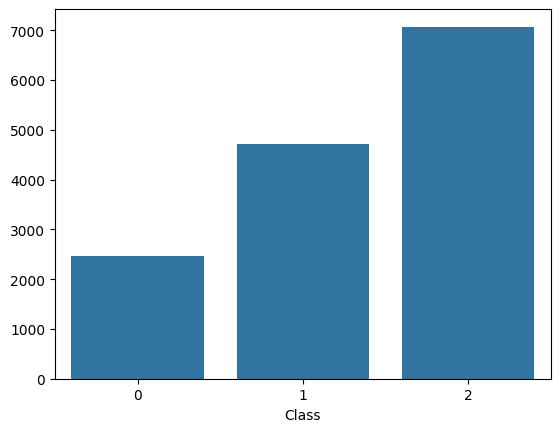

In [93]:
converted_df = pd.read_csv('converted_vegemite.csv')

distrib_of_class = converted_df['Class'].value_counts()
print(distrib_of_class)

sns.barplot(x=distrib_of_class.index, y=distrib_of_class.values)

In [94]:
X = converted_df.drop('Class', axis=1)
Y = converted_df['Class']

print(f"Class before re-distributed: ({Y.value_counts()})")
smote_resampler = SMOTE(random_state=42)
tomek_links_resampler = TomekLinks()

X_smote, Y_smote = smote_resampler.fit_resample(X, Y)
X_balanced, Y_balanced = tomek_links_resampler.fit_resample(X_smote, Y_smote)

print(f"Class after re-distributed: ({Y_balanced.value_counts()})")
resampled_df = pd.concat([pd.DataFrame(X_balanced, columns=X.columns), pd.Series(Y_balanced, name='Class')], axis=1)
resampled_df.to_csv('resampled_vegemite.csv', index=False)

Class before re-distributed: (Class
2    7069
1    4708
0    2460
Name: count, dtype: int64)
Class after re-distributed: (Class
0    7069
1    6981
2    6959
Name: count, dtype: int64)


**Data normalization**

In [95]:
resampled_df = pd.read_csv('resampled_vegemite.csv')

In [96]:
resampled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
FFTE Feed tank level SP,21009.0000000,1.7417297,0.6630057,0.0000000,2.0000000,2.0000000,2.0000000,2.0000000
FFTE Production solids SP,21009.0000000,41.7700016,1.1141608,39.0000000,40.7400000,42.0000000,43.0000000,43.0000000
FFTE Steam pressure SP,21009.0000000,118.1798552,16.2784248,60.0000000,106.8585133,120.0000000,128.9200000,225.0000000
TFE Out flow SP,21009.0000000,2402.6067996,386.2680433,1687.1800000,2066.6700000,2235.0223056,2846.5100000,3012.5600000
TFE Production solids SP,21009.0000000,62.5481735,14.4058019,0.0000000,62.0000000,65.0000000,70.0000000,98.0000000
TFE Vacuum pressure SP,21009.0000000,-66.0996103,13.2832639,-80.0000000,-78.5900000,-70.0206336,-55.5800000,-36.3700000
TFE Steam pressure SP,21009.0000000,115.1119451,24.2315166,2.0000000,120.0000000,120.0000000,120.0000000,135.0000000
FFTE Feed flow SP,21009.0000000,9970.0459733,1328.9297368,1100.0000000,9396.2629531,9600.0000000,10200.0000000,18000.0000000
FFTE Out steam temp SP,21009.0000000,49.7144614,1.9326404,40.7100000,50.0000000,50.0000000,50.0000000,54.3800000
Extract tank Level,21009.0000000,47.6381387,18.3158406,0.6200000,37.8025008,52.2298592,62.2400000,75.6200000


In [97]:
features = resampled_df.drop('Class', axis=1)
target = resampled_df['Class']

minmax_scaler = MinMaxScaler()
scaled_features = minmax_scaler.fit_transform(features)

scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_df['Class'] = target.values
print(scaled_df.info())
scaled_df.to_csv('scaled_vegemite.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21009 entries, 0 to 21008
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   FFTE Feed tank level SP        21009 non-null  float64
 1   FFTE Production solids SP      21009 non-null  float64
 2   FFTE Steam pressure SP         21009 non-null  float64
 3   TFE Out flow SP                21009 non-null  float64
 4   TFE Production solids SP       21009 non-null  float64
 5   TFE Vacuum pressure SP         21009 non-null  float64
 6   TFE Steam pressure SP          21009 non-null  float64
 7   FFTE Feed flow SP              21009 non-null  float64
 8   FFTE Out steam temp SP         21009 non-null  float64
 9   Extract tank Level             21009 non-null  float64
 10  Extract tank Out flow PV       21009 non-null  float64
 11  FFTE Discharge density         21009 non-null  float64
 12  FFTE Discharge solids          21009 non-null 

**Add composite features**

In [98]:
print(len([c for c in scaled_df.columns]))

45


In [99]:
correlation = abs(scaled_df.corr())
print(correlation.T)

                               FFTE Feed tank level SP  \
FFTE Feed tank level SP                      1.0000000   
FFTE Production solids SP                    0.0907946   
FFTE Steam pressure SP                       0.2313989   
TFE Out flow SP                              0.0365850   
TFE Production solids SP                     0.2982837   
TFE Vacuum pressure SP                       0.2733836   
TFE Steam pressure SP                        0.5312621   
FFTE Feed flow SP                            0.4882185   
FFTE Out steam temp SP                       0.0370172   
Extract tank Level                           0.0649809   
Extract tank Out flow PV                     0.1277740   
FFTE Discharge density                       0.0435163   
FFTE Discharge solids                        0.2934254   
FFTE Feed flow rate PV                       0.2660417   
FFTE Feed tank level PV                      0.2138379   
FFTE Heat temperature 1                      0.1038144   
FFTE Heat temp

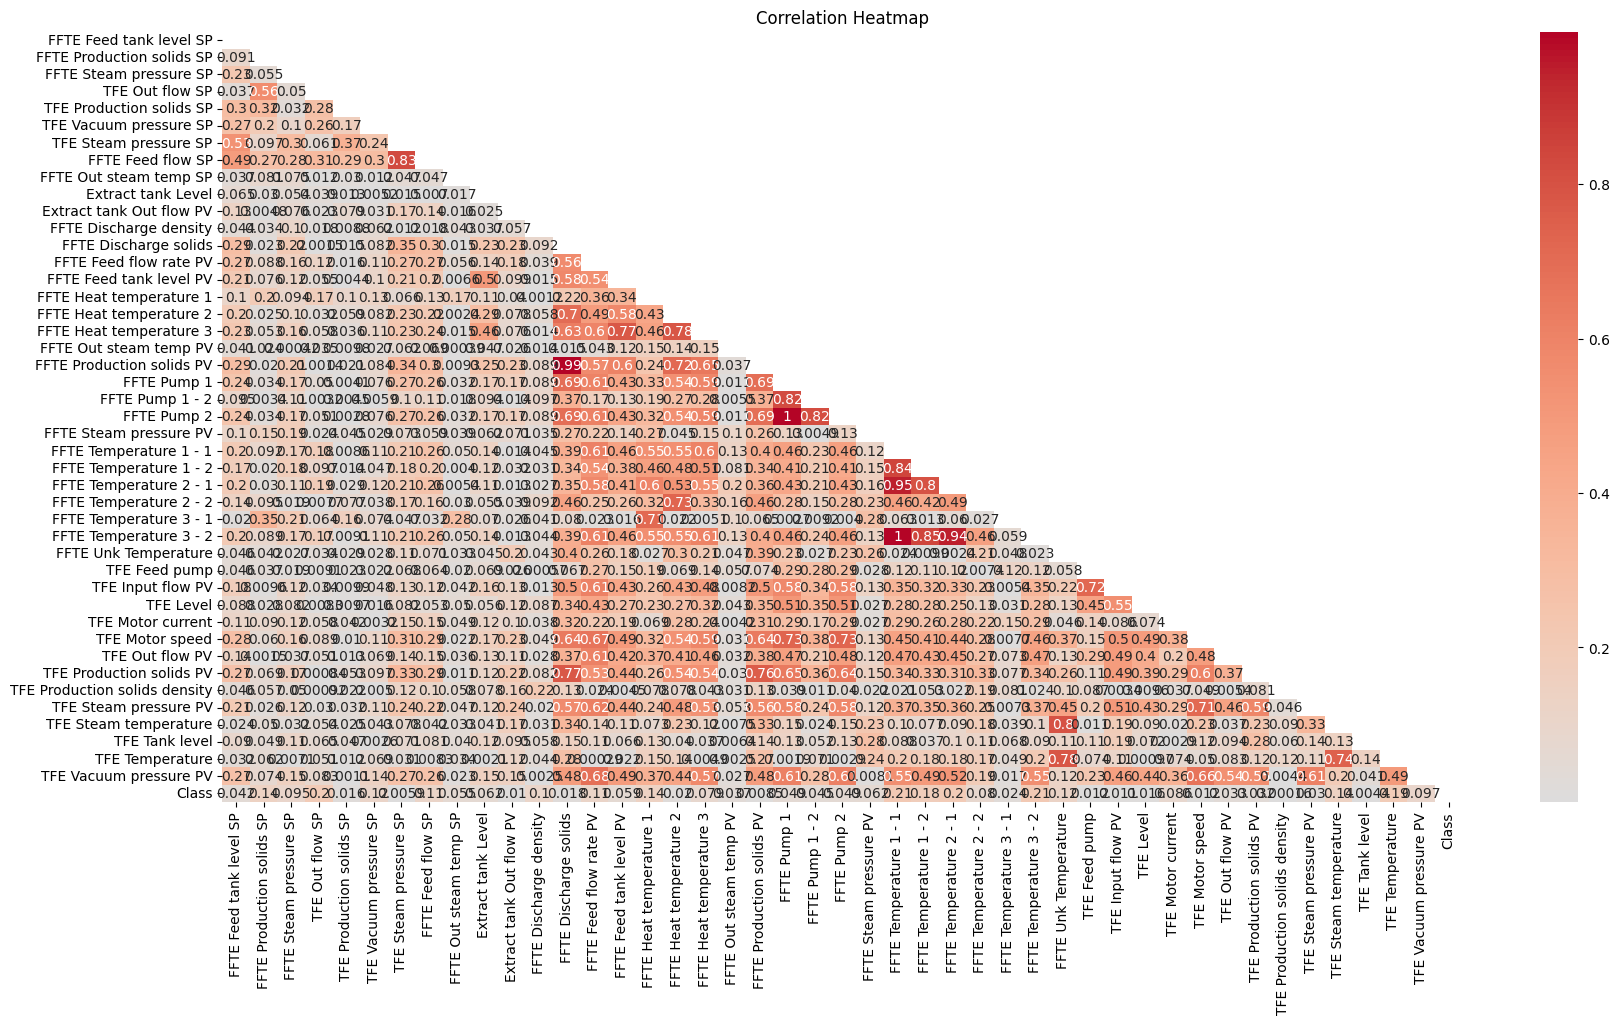

In [100]:
mask = np.triu(np.ones_like(correlation, dtype=bool))
plt.figure(figsize=(20, 10))
sns.heatmap(correlation, annot=True, mask=mask, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [101]:
corr_matrix = scaled_df.corr()
correlation_threshold = 0.1
target_correlation = corr_matrix['Class']

low_positive_correlation = target_correlation[(target_correlation > 0) & (target_correlation <= correlation_threshold)].index.tolist()
filtered_correlation = corr_matrix.loc[low_positive_correlation, low_positive_correlation]

pairs = []
for k, v in enumerate(low_positive_correlation):
  for i in low_positive_correlation[k + 1:]:
    if 0 < filtered_correlation.loc[v, i] <= correlation_threshold:
      pairs.append((v, i))

print(pairs)

[('FFTE Steam pressure SP', 'Extract tank Out flow PV'), ('FFTE Steam pressure SP', 'TFE Feed pump'), ('FFTE Steam pressure SP', 'TFE Level'), ('FFTE Steam pressure SP', 'TFE Out flow PV'), ('TFE Production solids SP', 'FFTE Discharge solids'), ('TFE Production solids SP', 'FFTE Heat temperature 2'), ('TFE Production solids SP', 'FFTE Production solids PV'), ('TFE Production solids SP', 'FFTE Steam pressure PV'), ('TFE Production solids SP', 'FFTE Temperature 2 - 2'), ('TFE Production solids SP', 'TFE Level'), ('TFE Production solids SP', 'TFE Production solids PV'), ('TFE Production solids SP', 'TFE Steam pressure PV'), ('Extract tank Out flow PV', 'FFTE Steam pressure PV'), ('Extract tank Out flow PV', 'TFE Feed pump'), ('FFTE Steam pressure PV', 'TFE Level'), ('FFTE Steam pressure PV', 'TFE Vacuum pressure PV'), ('FFTE Temperature 2 - 2', 'TFE Feed pump'), ('TFE Motor current', 'TFE Tank level'), ('TFE Out flow PV', 'TFE Tank level')]


In [102]:
for (corr_feature_1, corr_feature_2) in pairs:
  new_corr_feature_name = f"{corr_feature_1}_{corr_feature_2}"
  scaled_df[new_corr_feature_name] = scaled_df[corr_feature_1] + scaled_df[corr_feature_2]

scaled_df.head()
scaled_df.to_csv('composited_vegemite.csv', index=False)
print(len([c for c in scaled_df.columns]))

64


# **Feature selection, Model Training and Evaluation**

**Feature selection**

In [103]:
composited_df = pd.read_csv('composited_vegemite.csv')

In [104]:
composited_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21009 entries, 0 to 21008
Data columns (total 64 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   FFTE Feed tank level SP                             21009 non-null  float64
 1   FFTE Production solids SP                           21009 non-null  float64
 2   FFTE Steam pressure SP                              21009 non-null  float64
 3   TFE Out flow SP                                     21009 non-null  float64
 4   TFE Production solids SP                            21009 non-null  float64
 5   TFE Vacuum pressure SP                              21009 non-null  float64
 6   TFE Steam pressure SP                               21009 non-null  float64
 7   FFTE Feed flow SP                                   21009 non-null  float64
 8   FFTE Out steam temp SP                              21009 non-null  float64


In [105]:
composited_df.shape

(21009, 64)

In [106]:
X = composited_df.drop('Class', axis=1)
Y = composited_df['Class']

standard_scaler = StandardScaler()
X = pd.DataFrame(standard_scaler.fit_transform(X), columns=X.columns)

selector = SelectKBest(score_func=f_classif, k=20)
X_new = selector.fit_transform(X, Y)

selected_features = X.columns[selector.get_support()]
print(selected_features)

X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

Index(['FFTE Production solids SP', 'TFE Out flow SP',
       'TFE Production solids SP', 'TFE Vacuum pressure SP',
       'FFTE Feed flow SP', 'FFTE Out steam temp SP', 'FFTE Discharge density',
       'FFTE Feed flow rate PV', 'FFTE Heat temperature 1',
       'FFTE Heat temperature 3', 'FFTE Temperature 1 - 1',
       'FFTE Temperature 1 - 2', 'FFTE Temperature 2 - 1',
       'FFTE Temperature 3 - 2', 'FFTE Unk Temperature',
       'TFE Steam temperature', 'TFE Temperature',
       'TFE Production solids SP_FFTE Heat temperature 2',
       'TFE Production solids SP_FFTE Temperature 2 - 2',
       'FFTE Steam pressure PV_TFE Vacuum pressure PV'],
      dtype='object')


((14706, 20), (6303, 20), (14706,), (6303,))

**Model training**

In [107]:
def train_model_and_generate_report(models: dict, X_train, X_test, Y_train, Y_test):
  _results = {}
  for name, model in models.items():
    print(f"Training model: {name}")
    model.fit(X_train, Y_train)
    print(f"Generating report for: {name}")
    Y_predict = model.predict(X_test)
    _results[name] = {
        'classification': classification_report(Y_test, Y_predict),
        'confusion': confusion_matrix(Y_test, Y_predict)
    }
  return _results

In [108]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC()
}

results = train_model_and_generate_report(models, X_train, X_test, y_train, y_test)

Training model: Logistic Regression
Generating report for: Logistic Regression
Training model: Decision Tree
Generating report for: Decision Tree
Training model: Random Forest
Generating report for: Random Forest
Training model: K-Nearest Neighbors
Generating report for: K-Nearest Neighbors
Training model: Support Vector Machine
Generating report for: Support Vector Machine


**Evaluate each models**

In [109]:
for name, result in results.items():
  print(f"Overall Report for model: {name}")
  print(f"Classification Report:\n{result['classification']}")
  print(f"Confusion Matrix:\n{result['confusion']}\n")

Overall Report for model: Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.65      0.56      2148
           1       0.43      0.26      0.32      2073
           2       0.55      0.56      0.56      2082

    accuracy                           0.50      6303
   macro avg       0.49      0.49      0.48      6303
weighted avg       0.49      0.50      0.48      6303

Confusion Matrix:
[[1405  363  380]
 [ 938  542  593]
 [ 538  369 1175]]

Overall Report for model: Decision Tree
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2148
           1       0.96      0.96      0.96      2073
           2       0.96      0.97      0.97      2082

    accuracy                           0.97      6303
   macro avg       0.97      0.97      0.97      6303
weighted avg       0.97      0.97      0.97      6303

Confusion Matrix:
[[2073   41   

In [114]:
import pickle

#Dump best model
fName = 'models/best_model.pkl'
pickle.dump(models['Random Forest'], open(fName, 'wb'))

#Dump all models
for name, model in models.items():
  fName = f'models/{name}.pkl'
  pickle.dump(model, open(fName, 'wb'))

# **ML to AI**

In [115]:
realtime_test_df = pd.read_csv('realtime_test_df_vegemite.csv')

In [116]:
X_test = realtime_test_df.drop(columns=['Class'])
Y_test = realtime_test_df['Class']

# Apply the same preprocessing steps as the training data
X_test = X_test.drop(columns=columns_to_drop, errors='ignore')

for c in columns_to_convert:
  X_test[c] = label_encoders[c].transform(X_test[c])

X_test = pd.DataFrame(minmax_scaler.transform(X_test), columns=X_test.columns)

for (composite_feature_1, composite_feature_2) in pairs:
  new_composite_feature_name = f"{composite_feature_1}_{composite_feature_2}"
  X_test[new_composite_feature_name] = X_test[composite_feature_1] + X_test[composite_feature_2]

# Re-apply StandardScaler to the test data using the scaler fitted on the training data
X_test = pd.DataFrame(standard_scaler.transform(X_test), columns=X_test.columns)

# Select the same features as used in training
X_test = X_test[selected_features]

In [117]:
best_model = pickle.load(open('models/best_model.pkl', 'rb'))

correct_predict = 0

for idx, row in X_test.iterrows():
  X_2d = row.values.reshape(1, -1)
  Y_real = Y_test.iloc[idx]
  Y_predict = best_model.predict(X_2d)[0]
  if Y_predict == Y_real:
    correct_predict += 1

acc = correct_predict / len(X_test)

print(f"Correct predict: {correct_predict}/{len(Y_test)}")
print(f"Accuracy: {acc:.2f}")

print(classification_report(Y_test, best_model.predict(X_test)))

Correct predict: 996/1000
Accuracy: 1.00
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       182
           1       1.00      0.99      0.99       339
           2       1.00      1.00      1.00       479

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [118]:
saved_models = {
    'Decision Tree': pickle.load(open('models/Decision Tree.pkl', 'rb')),
    'K-Nearest Neighbors': pickle.load(open('models/K-Nearest Neighbors.pkl', 'rb')),
    'Logistic Regression': pickle.load(open('models/Logistic Regression.pkl', 'rb')),
    'Random Forest': pickle.load(open('models/Random Forest.pkl', 'rb')),
    'Support Vector Machine': pickle.load(open('models/Support Vector Machine.pkl', 'rb'))
}

accuracies = {}
results = {}

for name, model in saved_models.items():
  Y_pred = model.predict(X_test)
  accuracies[name] = accuracy_score(Y_test, Y_pred)
  results[name] = classification_report(Y_test, Y_pred)

for name, acc in accuracies.items():
  print(f"Accuracy of {name}: {acc:.2f}")

Accuracy of Decision Tree: 0.96
Accuracy of K-Nearest Neighbors: 0.94
Accuracy of Logistic Regression: 0.47
Accuracy of Random Forest: 1.00
Accuracy of Support Vector Machine: 0.78


# **Delelop rules for ML models**

In [119]:
shuffled_df = pd.read_csv('shuffled_vegemite.csv')

X_shuffled = shuffled_df.drop(columns=["Class"])
Y_shuffled = shuffled_df["Class"]

X_shuffled = X_shuffled.filter(like='SP')
X_shuffled.columns

Index(['FFTE Feed tank level SP', 'FFTE Production solids SP',
       'FFTE Steam pressure SP', 'TFE Out flow SP', 'TFE Production solids SP',
       'TFE Vacuum pressure SP', 'TFE Steam pressure SP',
       'TFE Steam temperature SP', 'FFTE Feed flow SP',
       'FFTE Out steam temp SP'],
      dtype='object')

In [120]:
from sklearn.tree import export_text, plot_tree

model = DecisionTreeClassifier(random_state=42)
model.fit(X_shuffled, Y_shuffled)

tree_rules = export_text(model, feature_names=X_shuffled.columns.tolist())
print(tree_rules)

|--- TFE Out flow SP <= 2249.11
|   |--- FFTE Steam pressure SP <= 119.98
|   |   |--- TFE Out flow SP <= 2100.70
|   |   |   |--- TFE Vacuum pressure SP <= -67.99
|   |   |   |   |--- FFTE Feed flow SP <= 9395.00
|   |   |   |   |   |--- TFE Production solids SP <= 64.25
|   |   |   |   |   |   |--- FFTE Steam pressure SP <= 103.50
|   |   |   |   |   |   |   |--- FFTE Steam pressure SP <= 94.00
|   |   |   |   |   |   |   |   |--- TFE Production solids SP <= 52.75
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- TFE Production solids SP >  52.75
|   |   |   |   |   |   |   |   |   |--- TFE Production solids SP <= 60.00
|   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |   |--- TFE Production solids SP >  60.00
|   |   |   |   |   |   |   |   |   |   |--- TFE Vacuum pressure SP <= -76.47
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- TFE Vacuum pressure SP 